In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\ADMIN\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
Movie=pd.read_csv("movies.DAT", delimiter='::', encoding='latin-1')
Ratings=pd.read_csv("ratings.dat", delimiter='::', encoding='latin-1')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6540\3828345397.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Movie=pd.read_csv("movies.DAT", delimiter='::', encoding='latin-1')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6540\3828345397.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Ratings=pd.read_csv("ratings.dat", delimiter='::', encoding='latin-1')


In [3]:
Movie.columns

Index(['ID', 'Title', 'Genres'], dtype='object')

In [4]:
Movie

,ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
Ratings

,UserID,MovieID,Ratings,TimeStamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [6]:
df = pd.merge(Movie,Ratings, left_on="ID", right_on="MovieID")
df

,ID,Title,Genres,UserID,MovieID,Ratings,TimeStamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,1,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,1,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,1,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,1,5,978226474
...,...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,3952,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3952,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,3952,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,3952,1,979852537


In [7]:
df.drop(['TimeStamp', 'ID'], axis=1, inplace=True)

In [8]:
df = df.drop_duplicates(["UserID",'Title'])

In [9]:
df

,Title,Genres,UserID,MovieID,Ratings
0,Toy Story (1995),Animation|Children's|Comedy,1,1,5
1,Toy Story (1995),Animation|Children's|Comedy,6,1,4
2,Toy Story (1995),Animation|Children's|Comedy,8,1,4
3,Toy Story (1995),Animation|Children's|Comedy,9,1,5
4,Toy Story (1995),Animation|Children's|Comedy,10,1,5
...,...,...,...,...,...
1000204,"Contender, The (2000)",Drama|Thriller,5812,3952,4
1000205,"Contender, The (2000)",Drama|Thriller,5831,3952,3
1000206,"Contender, The (2000)",Drama|Thriller,5837,3952,4
1000207,"Contender, The (2000)",Drama|Thriller,5927,3952,1


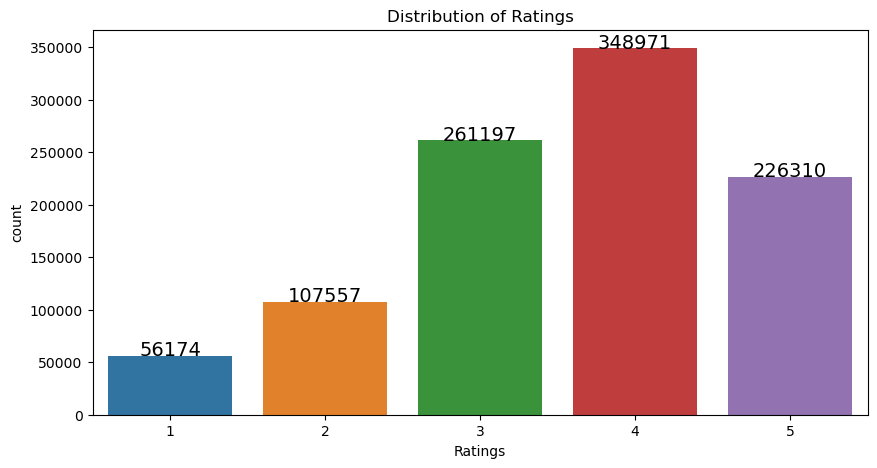

In [22]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=df, x='Ratings')
labels = (df['Ratings'].value_counts().sort_index())
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')

for i,v in enumerate(labels):
    ax.text(i, v+100, str(v), horizontalalignment='center', size=14, color='black')
plt.show()

In [10]:
df_pivot = df.pivot(index="UserID", columns='Title', values='Ratings').fillna(0)
df_pivot 

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj rlighetens kj tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_pivot = df_pivot.astype('int64')

In [12]:
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

df_pivot = df_pivot.applymap(encode_ratings)

In [13]:
df_pivot=df_pivot.astype('int32')

# Train the Model

The apriori model calculates the probability to determine how likely a user will watch movie M2 if he has already watched a movie M1. It does so by computing support, confidence and lift for different combinations of movies.

In [14]:
from mlxtend.frequent_patterns import apriori, association_rules 
df_pivot.iloc[0:54,0:10]

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957)
UserID,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


In [15]:
frequent_itemset = apriori(df_pivot.iloc[:,0:700], min_support=0.07, use_colnames=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [16]:
frequent_itemset

,support,itemsets
0,0.115894,(10 Things I Hate About You (1999))
1,0.093543,(101 Dalmatians (1961))
2,0.101987,(12 Angry Men (1957))
3,0.124172,"(13th Warrior, The (1999))"
4,0.095199,"(20,000 Leagues Under the Sea (1954))"
...,...,...
5642,0.070695,"(Back to the Future Part II (1989), Back to th..."
5643,0.070530,"(Back to the Future (1985), Blade Runner (1982..."
5644,0.072351,"(Back to the Future (1985), Blade Runner (1982..."
5645,0.073013,"(Back to the Future Part II (1989), Back to th..."


In [17]:
rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

In [20]:
df_res = rules.sort_values(by=['lift'], ascending=False)
df_res


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
17444,(Batman Forever (1995)),"(Batman Returns (1992), Batman & Robin (1997))",0.128642,0.083775,0.075331,0.585586,6.989994,0.064554,2.210891,0.983452
17441,"(Batman Returns (1992), Batman & Robin (1997))",(Batman Forever (1995)),0.083775,0.128642,0.075331,0.899209,6.989994,0.064554,8.645234,0.935292
17440,"(Batman Returns (1992), Batman Forever (1995))",(Batman & Robin (1997)),0.108940,0.100331,0.075331,0.691489,6.892072,0.064401,2.916168,0.959426
17445,(Batman & Robin (1997)),"(Batman Returns (1992), Batman Forever (1995))",0.100331,0.108940,0.075331,0.750825,6.892072,0.064401,3.576041,0.950245
26912,"(Alien: Resurrection (1997), Back to the Futur...","(Alien (1992), Aliens (1986))",0.092881,0.118377,0.070530,0.759358,6.414719,0.059535,3.663631,0.930538
...,...,...,...,...,...,...,...,...,...,...
649,(Alien (1979)),(American Beauty (1999)),0.335099,0.567550,0.204636,0.610672,1.075980,0.014450,1.110761,0.106203
1368,(Annie Hall (1977)),(Braveheart (1995)),0.220861,0.404470,0.094371,0.427286,1.056410,0.005039,1.039839,0.068534
1369,(Braveheart (1995)),(Annie Hall (1977)),0.404470,0.220861,0.094371,0.233320,1.056410,0.005039,1.016250,0.089664
317,"(African Queen, The (1951))",(American Beauty (1999)),0.175000,0.567550,0.102152,0.583728,1.028505,0.002831,1.038864,0.033594


Let's see what your model recommends to someone who has watched the Alien(1979)

In [39]:
df_Alien = df_res[df_res['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == "Alien (1979)"    )]
df_Alien

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
37414,(Alien (1979)),"(Back to the Future (1985), 2001: A Space Odys...",0.335099,0.073841,0.071026,0.211957,2.870443,0.046282,1.175264,0.980029
43151,(Alien (1979)),"(Back to the Future Part II (1989), Back to th...",0.335099,0.073841,0.070695,0.210968,2.857061,0.045951,1.173792,0.977574
37745,(Alien (1979)),"(Back to the Future Part II (1989), Blade Runn...",0.335099,0.076656,0.073179,0.218379,2.848838,0.047492,1.181320,0.976055
19093,(Alien (1979)),"(2001: A Space Odyssey (1968), Alien (1992), ...",0.335099,0.082285,0.078477,0.234190,2.846088,0.050903,1.198358,0.975545
37774,(Alien (1979)),"(2001: A Space Odyssey (1968), Blade Runner (1...",0.335099,0.075662,0.071854,0.214427,2.834001,0.046500,1.176641,0.973291
...,...,...,...,...,...,...,...,...,...,...
8385,(Alien (1979)),"(American Pie (1999), American Beauty (1999))",0.335099,0.188079,0.076490,0.228261,1.213641,0.013465,1.052066,0.264751
739,(Alien (1979)),"(Bug's Life, A (1998))",0.335099,0.281954,0.114404,0.341403,1.210849,0.019921,1.090267,0.261893
677,(Alien (1979)),(Austin Powers: The Spy Who Shagged Me (1999)),0.335099,0.237417,0.092715,0.276680,1.165374,0.013157,1.054281,0.213425
653,(Alien (1979)),(American Pie (1999)),0.335099,0.229967,0.088907,0.265316,1.153715,0.011846,1.048115,0.200383


In [33]:
movies = df_Alien['consequents'].values

movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

In [34]:
movie_list[:10]

['Back to the Future (1985)',
 '2001: A Space Odyssey (1968)',
 'Alien  (1992)',
 'Aliens (1986)',
 'Back to the Future Part II (1989)',
 'Blade Runner (1982)',
 'Batman (1989)',
 'Abyss, The (1989)',
 'Back to the Future Part III (1990)',
 'Brazil (1985)']

Great! You have the top 10 movies that the user is most likely to watch. The result looks convincing to me.

We have a our own recommendation system now.